In [1]:
import pandas as pd
import numpy as np  
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px 
import scipy.stats as stats
sns.set_style("darkgrid")
sns.set_palette("Accent")
sns.set_context("talk")

Загружаем файл HR.csv в pandas dataframe

In [2]:
HR = pd.read_csv("HR.csv", sep = ",")
#HR.info()
#HR.isnull().sum()
#HR.dtypes
HR.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Рассчитаем основные статистики для переменных: количество строк, среднее значение, стандартное отклонение, минимальное значение, нижний квартиль, медиану, верхний квартиль и max.

In [3]:
HR.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.613,0.249,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716,0.171,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803,1.233,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050,49.943,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498,1.460,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.145,0.352,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238,0.426,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021,0.144,0.00,0.00,0.00,0.00,1.0


Дополнительно выведем показатель моды.

In [4]:
HR.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


Рассчитаем и визуализируем корреляционную матрицу для количественных переменных. Определим две наиболее и две наименее скоррелированные переменные.

In [5]:
HR_count = HR[["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours", "time_spend_company", "Work_accident", "left", "promotion_last_5years"]]
HR_count.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [6]:
corr_data = HR_count.corr().round(2)
corr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


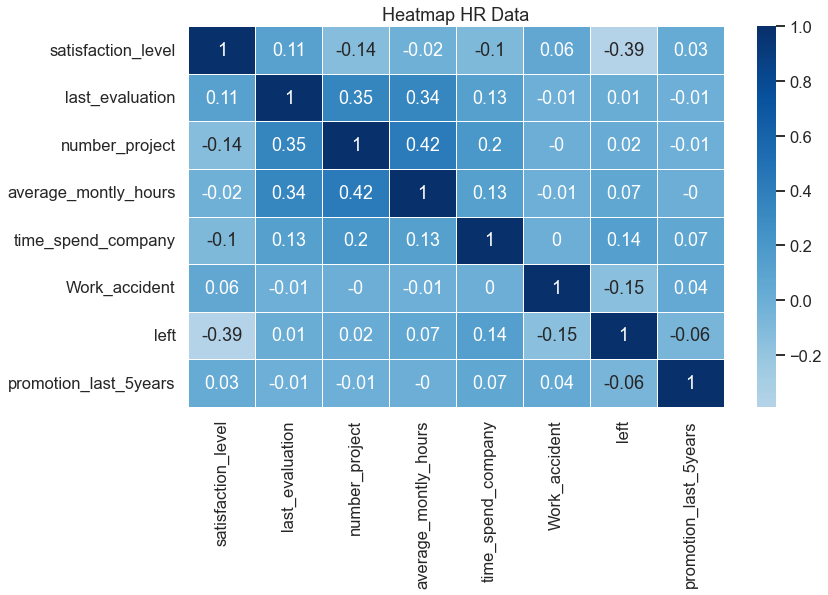

In [7]:
plt.figure(figsize = (12, 7))
sns.heatmap(corr_data,
            center = 0, 
            linewidth = 1,
            cmap = "Blues",
            annot = True)
plt.title("Heatmap HR Data")
plt.show()

Наиболее коррелированные переменые:

*average_montly_hours/number_project
*average_montly_hours/last_evaluation
*last_evaluation/number_project

То есть среднее количество часов на рабочем месте в месяц и количество проектов, выполненных за время работы 
или время с момента последней оценки в годах. Или время с момента последней оценки в годах и количество проектов, 
выполненных за время работы.

Наименее коррелированные переменные:

*left/satisfaction_level
*left/Work_accident
*number_project/satisfaction_level

То есть показатель, уволился ли сотрудник и уровень удовлетворенности работой и происходили ли несчастные случаи 
на рабочем месте с сотрудником или количество проектов, выполненных за время работы и уровень удовлетворенности работой

Посмотрим, сколько сотрудников работает в каждом департаменте. 

In [8]:
HR.groupby("department")["department"].size().sort_values(ascending = False).reset_index(name = "employees")

,department,employees
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


Самый многочисленный департамент - это Sales, за ним следуют Techical, Support и IT.
Если объединить эти три департамента в один IT департамент, то по количеству сотрудников он выйдет на первое место.

In [9]:
HR["department"] = np.where(HR["department"] == "support", "IT", HR["department"])
HR["department"] = np.where(HR["department"] == "technical", "IT", HR["department"])
HR.groupby("department")["department"].size().sort_values(ascending = False).reset_index(name = "employees")

,department,employees
0,IT,6176
1,sales,4140
2,product_mng,902
3,marketing,858
4,RandD,787
5,accounting,767
6,hr,739
7,management,630


Рассмотрим распределение сотрудников по уровню заработной платы. 

In [10]:
HR.groupby("salary")["salary"].count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

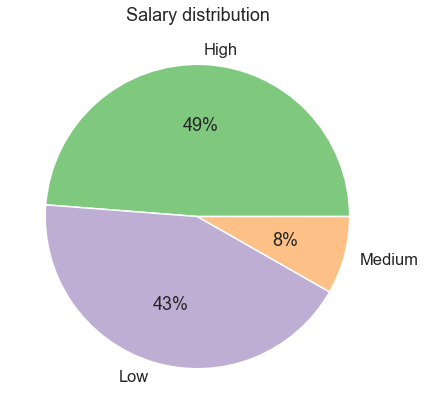

In [11]:
labels = ["High", "Low", "Medium"]
sizes = HR["salary"].value_counts()
plt.figure(figsize = (7,7))
plt.pie(sizes, labels = labels, autopct = "%.0f%%")
plt.title("Salary distribution")
plt.show()

Соответсвенно высокий и низкий уровень заработной платы приблизительно равно распределены: 49% - высокий уровень, 43% - низкий уровень и 8% - средний. Теперь посмотрим, как распределяется уровень заработной платы сотрудников по департаментам.

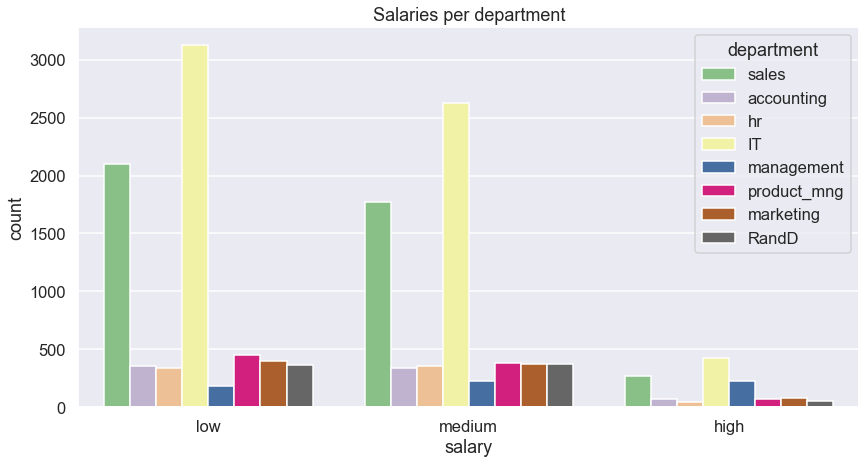

In [12]:
plt.figure(figsize = (14,7))
sns.countplot(x = "salary", data = HR, hue = "department")
plt.title("Salaries per department")
plt.show()  

Распределение заработной платы по департаментам совпадает с распределением количества сотрудников по департаментам.

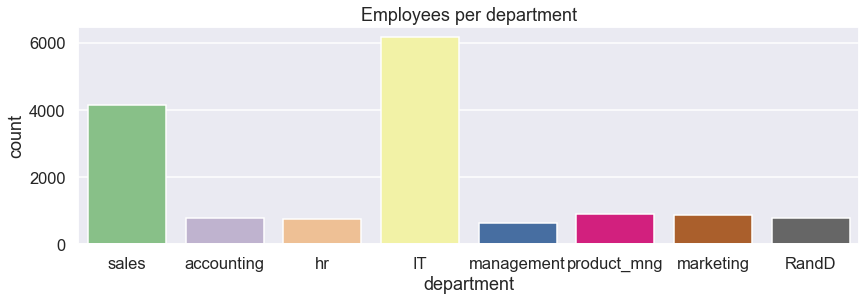

In [13]:
plt.figure(figsize = (14,4))
sns.countplot(x = "department", data = HR)
plt.title("Employees per department")
plt.show()  

Рассмотрим среднее время ежемесячно, которое сотрудники проводят на работе.

In [14]:
HR.average_montly_hours.mean()

201.0503366891126

<AxesSubplot:ylabel='average_montly_hours'>

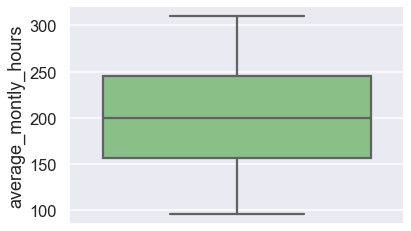

In [15]:
sns.boxplot(data = HR, y = "average_montly_hours")

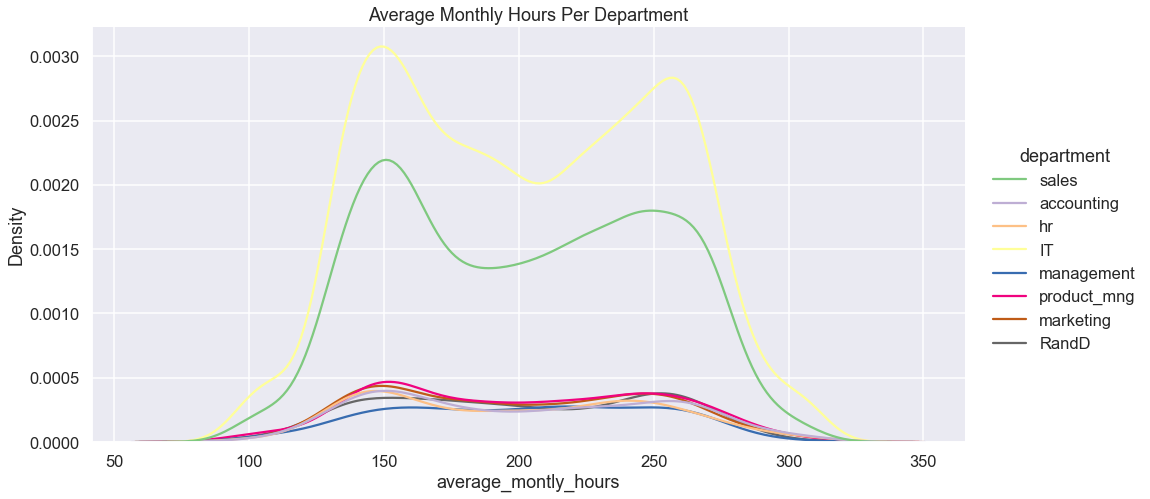

In [16]:
sns.displot(data = HR, x = "average_montly_hours", hue = "department", kind = "kde", height = 7,aspect = 2)
plt.title("Average Monthly Hours Per Department")
plt.show()

Text(0.5, 0.98, 'Average monthly hours of employees')

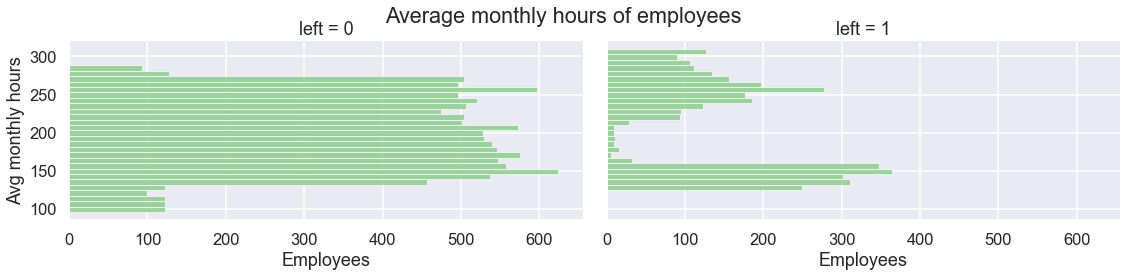

In [17]:
g = sns.displot(data = HR, y = "average_montly_hours", col = "left", height = 4, aspect = 2)
g.set_axis_labels("Employees", "Avg monthly hours")
g.fig.suptitle("Average monthly hours of employees")

Среднее количество часов в месяц  распределено неравномерно: у уволившихся сотрудников - больше и меньше среднего, у оставшихся сотрудников показатели сконцентрированы в пределах средних значений.

Проверим гипотезу: предположим, что сотрудники с высокой заработной платой проводят на работе больше времени, чем сотрудники с низкой.

In [18]:
HR.groupby("salary").average_montly_hours.mean()

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

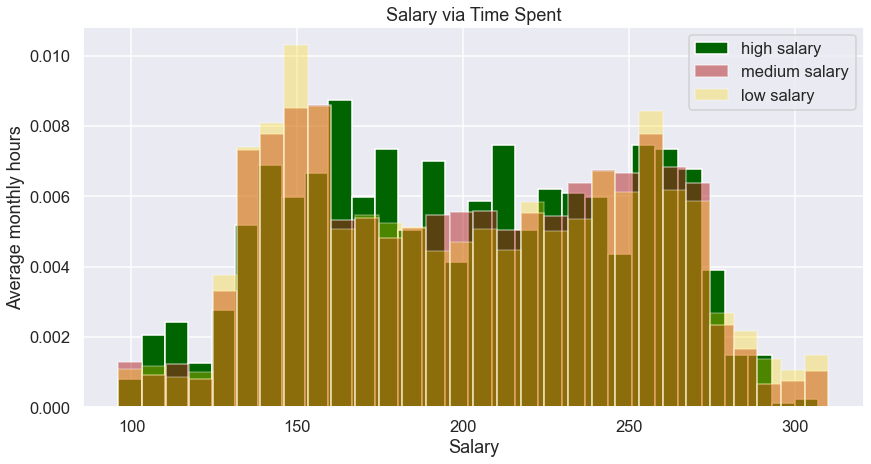

In [19]:
high_salary = list(HR.loc[HR["salary"] == "high"]["average_montly_hours"])
medium_salary = list(HR.loc[HR["salary"] == "medium"]["average_montly_hours"])
low_salary = list(HR.loc[HR["salary"] == "low"]["average_montly_hours"])
plt.figure(figsize = (14,7))
plt.hist(high_salary, bins = 30, density = True, color = "darkgreen");
plt.hist(medium_salary, bins = 30, density = True, alpha = 0.5,color = "firebrick");
plt.hist(low_salary, bins = 30, density = True, alpha = 0.3, color = "gold");
plt.title("Salary via Time Spent")
plt.xlabel("Salary")
plt.ylabel("Average monthly hours")
plt.legend(["high salary", "medium salary", "low salary"]) 

На диаграмме ярко выраженной зависимости количества проведенных на работе часов от размера заработной платы не отмечается. Проверим гипотезу.

In [20]:
stats.ttest_ind(high_salary, low_salary, equal_var = False)

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)

При проверке гипотезы, сравнивая количество проведенных часов с высокой заработной платой и низкой получаем результат p_value со значением 0.45, что выше 0.05, а значит у нас есть основание отвергнуть нулевую гипотезу.

Выделим из общего числа всех уволившихся сотрудников. 

In [21]:
HR["left"].value_counts() 

0    11428
1     3571
Name: left, dtype: int64

Общее количество уволившихся сотрудников: 3571. Посмотрим распределение по департаментам.

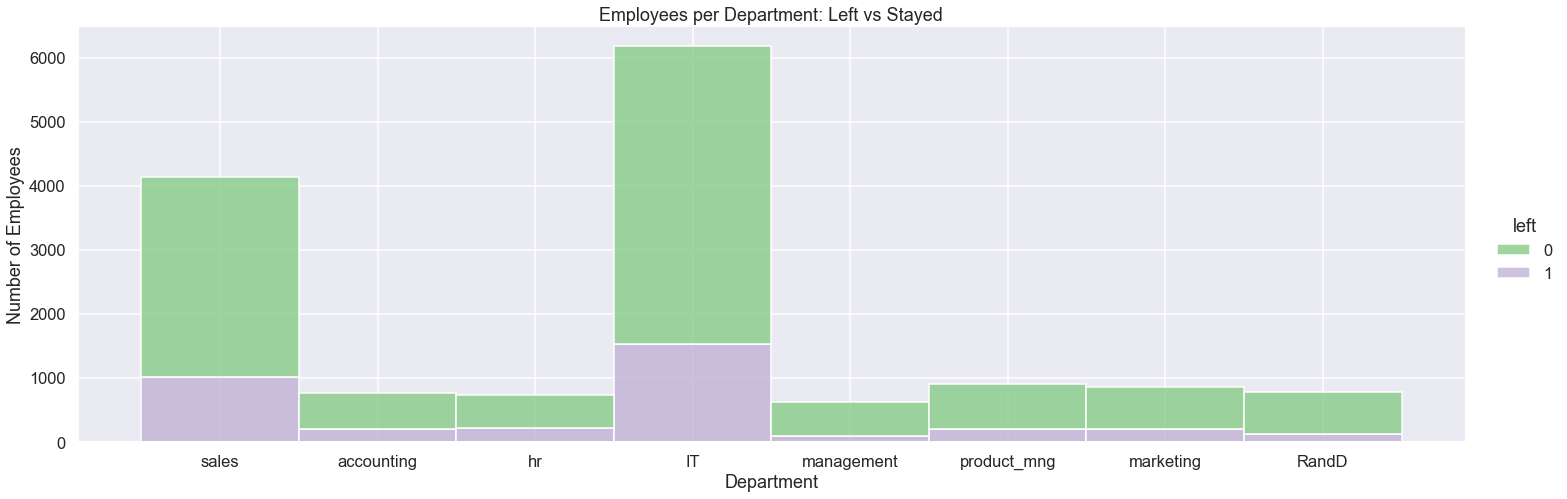

In [22]:
sns.displot(data = HR, x = "department", hue = "left", multiple="stack", height=7, aspect=3)
plt.title("Employees per Department: Left vs Stayed")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()

Сравним средние показатели для обеих категорий сотрудников (уволившихся и оставшихся).

In [23]:
HR.groupby("left").mean().round(2).T

left,0,1
satisfaction_level,0.67,0.44
last_evaluation,0.72,0.72
number_project,3.79,3.86
average_montly_hours,199.06,207.42
time_spend_company,3.38,3.88
Work_accident,0.18,0.05
promotion_last_5years,0.03,0.01


Перейдем к отдельным показателям для уволившихся сотрудников:

Text(0, 0.5, 'Employees')

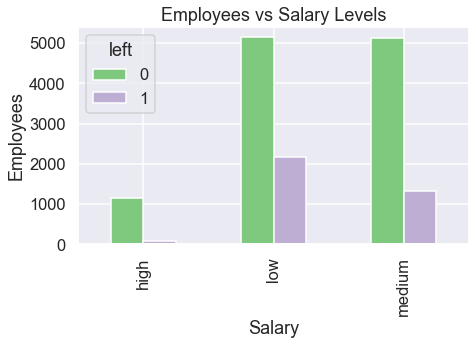

In [24]:
pd.crosstab(HR.salary,HR.left).plot(kind = "bar", figsize = (7,4))
plt.title("Employees vs Salary Levels")
plt.xlabel("Salary")
plt.ylabel("Employees")

На графике заметно, что количество уволившихся сотрудников с высокой заработной платой значительно меньше, чем сотрудников с низким уровнем зарплаты.

Рассчитаем следующие показатели среди сотрудников: 
a) доля сотрудников с повышением за последние 5 лет; 
b) средняя степень удовлетворенности; 
c) среднее количество проектов.

In [25]:
left = HR.loc[HR["left"] == 1]
stayed = HR.loc[HR["left"] == 0]
promotion_l = left.loc[left["promotion_last_5years"] == 1]
promotion_s = stayed.loc[stayed["promotion_last_5years"] == 1]

In [26]:
a_left = len(promotion_l)/len(left)
a_stayed = len(promotion_s)/len(left)
print("Доля уволившихся сотрудников с повышением за последние 5 лет составила", round(a_left,2))
print("Доля работающих сотрудников с повышением за последние 5 лет составила", round(a_stayed,2))

Доля уволившихся сотрудников с повышением за последние 5 лет составила 0.01
Доля работающих сотрудников с повышением за последние 5 лет составила 0.08


In [27]:
b_left = left["satisfaction_level"].mean()
b_stayed = stayed["satisfaction_level"].mean()
print("Средняя степень удовлетворенности уволившихся сотрудников:", round(b_left,2))
print("Средняя степень удовлетворенности работающих сотрудников:", round(b_stayed,2))

Средняя степень удовлетворенности уволившихся сотрудников: 0.44
Средняя степень удовлетворенности работающих сотрудников: 0.67


In [28]:
c_left = left["number_project"].mean()
c_stayed = stayed["number_project"].mean()
print("Среднее количество проектов у уволившихся сотрудников:", round(c_left,2))
print("Среднее количество проектов у работающих сотрудников:", round(c_stayed,2))

Среднее количество проектов у уволившихся сотрудников: 3.86
Среднее количество проектов у работающих сотрудников: 3.79


In [29]:
HR_tab = PrettyTable()
HR_tab.field_names = ["Employees", "Share with promotion", "Mean satisfaction level", "Mean number of projects"]
HR_tab.add_row(["Left", a_left, b_left, c_left])
HR_tab.add_row(["Stayed", a_stayed, b_stayed, c_stayed])
print(HR_tab)

+-----------+----------------------+-------------------------+-------------------------+
| Employees | Share with promotion | Mean satisfaction level | Mean number of projects |
+-----------+----------------------+-------------------------+-------------------------+
|    Left   | 0.005320638476617194 |   0.44009801176140917   |    3.8555026603192384   |
|   Stayed  | 0.08401008120974517  |    0.666809590479516    |    3.786664333216661    |
+-----------+----------------------+-------------------------+-------------------------+


Теперь разделим данные на тестовую и обучающую выборки (кроме department и salary).

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [32]:
X = HR.drop(columns = ["left", "department", "salary"])
X_norm = normalize(X)
y = HR["left"] 
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.20, random_state = 0)

Построим модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов.

In [33]:
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train,y_train)
pred = model.predict(X_test)

Можно проверить, как работает модель при помощи матрицы ошибок, сравнив прогноз (pred) с истиной (y_test)

[[2109  524]
 [ 190  177]]


<AxesSubplot:>

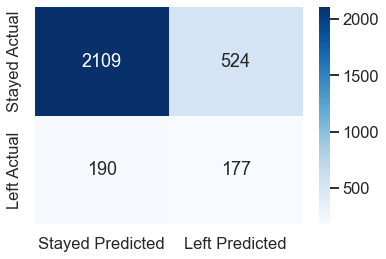

In [34]:
cm = confusion_matrix(pred, y_test)
print(cm)
conf_mat = pd.DataFrame(data = cm, 
                        columns = ["Stayed Predicted", "Left Predicted"], 
                        index = ["Stayed Actual", "Left Actual"])
sns.heatmap(conf_mat, annot = True, fmt = "d", cmap = "Blues")

Оценим качество модели на тестовой выборке.

In [35]:
print(classification_report(pred, y_test))
accuracy = accuracy_score(pred, y_test)
print("Оценка модели на тестовой выборке:")
print("показатель accuracy равен", accuracy)      

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      2633
           1       0.25      0.48      0.33       367

    accuracy                           0.76      3000
   macro avg       0.58      0.64      0.59      3000
weighted avg       0.84      0.76      0.79      3000

Оценка модели на тестовой выборке:
показатель accuracy равен 0.762


Таким образом, точность созданной модели составляет 76.2%